# PERBANDINGAN BULAN SUHU MAXIMUM
## Januari 2023

In [1]:
import pandas as dp
import numpy as np
from datetime import datetime
from scipy.stats import shapiro
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

#File Synoptik dan AWS
dft = dp.read_csv('C:/Users/Acer/Documents/suhumax.csv')
df = dp.read_csv('C:/Users/Acer/Documents/magang_juni2023/REVISI_PROJECT/HASIL DATA/DATA AWS 00-12 Januari 2023.csv')

In [2]:
#Mengolah Data AWS
df=df.drop(df.index[0])
#Filter data AWS berdasarkan tanggal
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
df['tt_air_max'] = df['tt_air_max'].astype(float)
filter=df.groupby(df.Tanggal.dt.date)['tt_air_max'].max()
filter_sorted = filter.sort_index(ascending=True)
df1=dp.DataFrame(filter_sorted)
df1=df1.drop(df1.index[-1])
df1.reset_index(drop=False, inplace=True)
df1=df1.drop(columns=['Tanggal'])
if len(df1)==31:
  tgl=[]
  for i in range(32):
    tgl.append(i)
  tgl.remove(0)
elif len(df1)==30:
  tgl=[]
  for i in range(31):
    tgl.append(i)
  tgl.remove(0)
elif len(df1)==29:
  tgl=[]
  for i in range(30):
    tgl.append(i)
  tgl.remove(0)
else:
  tgl=[]
  for i in range(29):
    tgl.append(i)
  tgl.remove(0)
df1['tgl']=tgl

#Mengolah Data Synoptik
dft = dft.drop(dft.index[-4:])

In [3]:
#UJI T
def ujiT(synop):
  global p_two4
  sample1_bar4, sample2_bar4 = np.mean(df_sorted_4[synop]), np.mean(df_sorted1_4['tt_air_max'])
  n14, n24 = len(df_sorted_4[synop]), len(df_sorted_4[synop])
  df_4=(n14+n24)-2
  var_sample14, var_sample24= np.var(df_sorted_4[synop], ddof=1), np.var(df_sorted1_4['tt_air_max'], ddof=1)

  # pooled sample variance
  var4 = ( ((n14-1)*var_sample14) + ((n24-1)*var_sample24) ) / (n14+n24-2)

  # standard error
  std_error4 = np.sqrt(var4 * (1.0 / n14 + 1.0 / n24))

  # calculate t statistics
  t4 = abs(sample1_bar4- sample2_bar4) / std_error4
  print('t static:',t4)
  # two-tailed critical value at alpha = 0.05
  t_c4 = stats.t.ppf(q=0.975, df=df_4)
  print("Critical value for t two tailed:",t_c4)


  # one-tailed critical value at alpha = 0.05
  t_c4 = stats.t.ppf(q=0.95, df=df_4)
  print("Critical value for t one tailed:",t_c4)


  # get two-tailed p value
  p_two4= 2*(1-stats.t.cdf(x=t4, df=df_4))
  print("p-value for two tailed:",p_two4)

  # get one-tailed p value
  p_one4= 1-stats.t.cdf(x=t4, df=df_4)
  print("p-value for one tailed:",p_one4)
  if p_two4>=0.05:
    print("Tidak ada perbedaan yang signifikan antara dua kelompok data")
  else:
    print("Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).")

In [4]:
#Uji Mann-Whitney U
def mwu(synop):
  global p_value
  df_cleaned_4['tt_air_max'] = df_cleaned_4['tt_air_max'].astype(float)
  stat, p_value = mannwhitneyu(df_cleaned_4['tt_air_max'], df_cleaned14[synop])
  print('Statistics=%.2f, p=%.2f' % (stat, p_value))
  # Level of significance
  alpha = 0.05
  # conclusion
  if p_value < alpha:
      print('Terdapat perbedaan yang siginifikan antara 2 sampel data')
  else:
      print('Tidak ada perbedaan yang siginifikan antara 2 sampel data')

In [5]:
#Normalisasi Data
def absolute_maximum_scale(series):
  return series / series.abs().max()

Indeks baris yang berisi NaN:
Index([], dtype='int64')
Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data
Data AWS tidak berdistribusi Normal
Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U
Statistics=513.00, p=0.49
Tidak ada perbedaan yang siginifikan antara 2 sampel data
Grafik Perbandingannya:


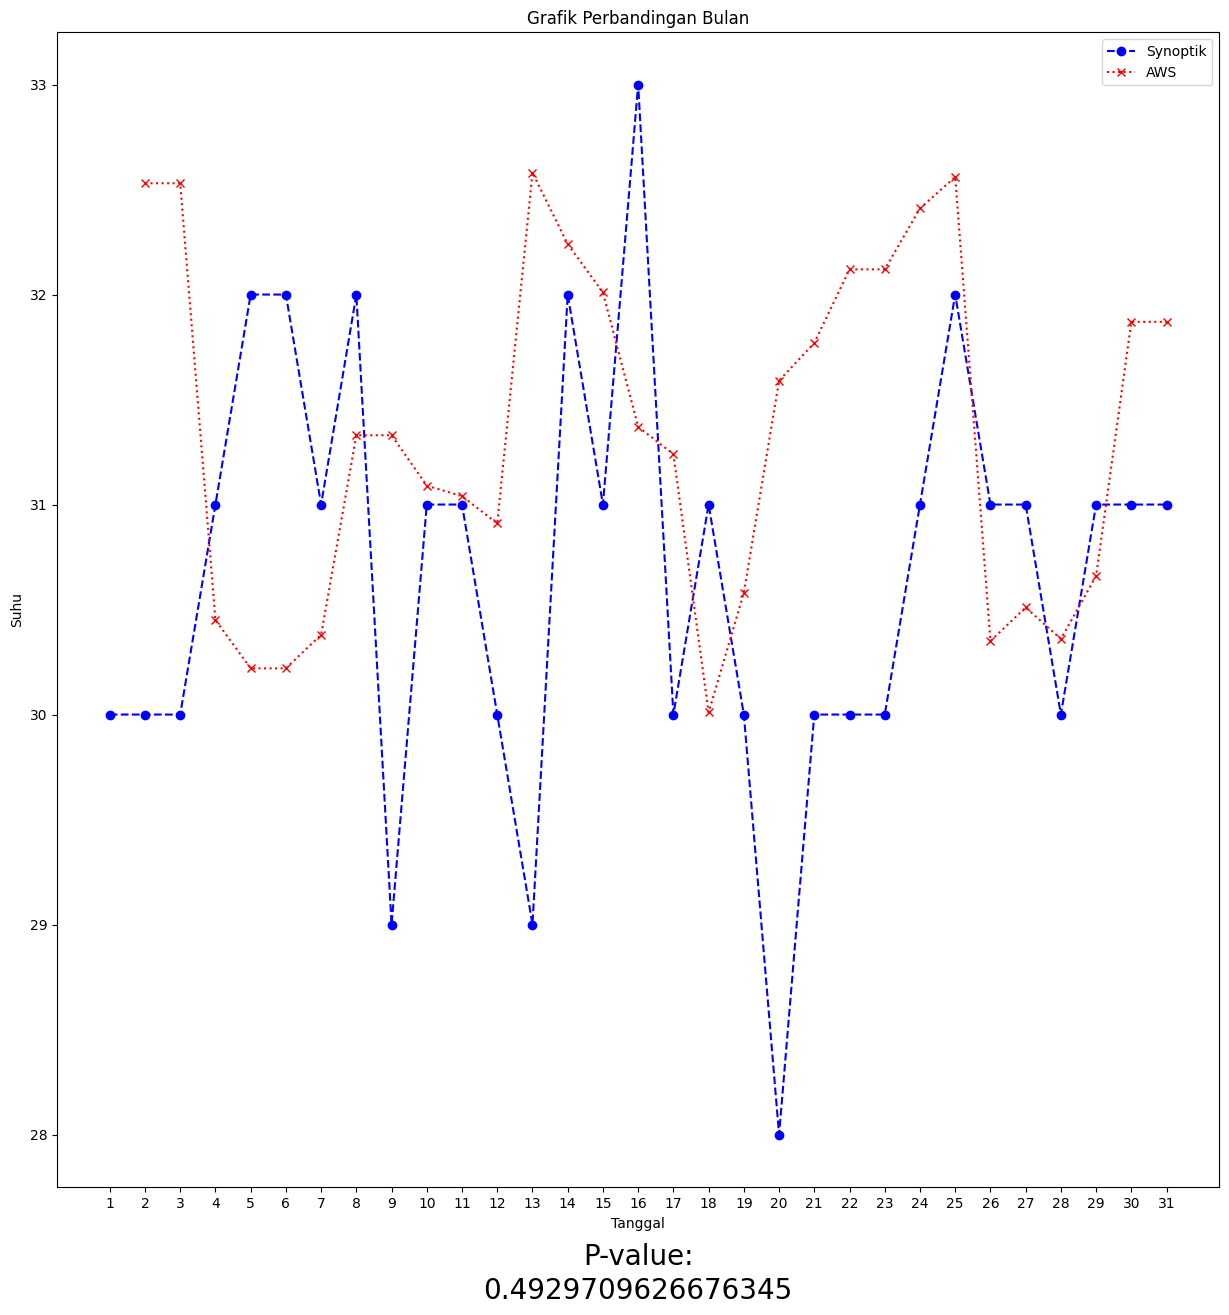

In [6]:
#Cek NaN
rows_with_nan4 = df1.isna().any(axis=1)
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1['tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Hapus tanggal synoptik yang di AWS adalah NaN
dft['Jan']=dft['Jan'].astype(float)
dft=dft.dropna(axis=1)
filter_hapus4 = dft.isin(c4).any(axis=1)
df_cleaned14 = dft.drop(dft[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='Jan', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_max', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['Jan'])
#AWS
df_sorted1_4['tt_air_max'] = df_sorted1_4['tt_air_max'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_max'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('Jan')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['Jan']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['tgl']=df_cleaned14['tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='Jan', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['Jan'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('Jan')
    else:
      print("Dilakukan Uji T")
      ujiT('Jan')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_max']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['tgl']=df_cleaned_4['tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_max', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_max'] = df_sorted1_4['tt_air_max'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_max'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('Jan')
    else:
      print("Dilakukan Uji T")
      ujiT('Jan')

#Grafik
print("Grafik Perbandingannya:")
dft['Jan']=dft['Jan'].astype(int)
df1['tt_air_max']=df1['tt_air_max'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Bulan')
plt.plot(dft['tgl'], dft['Jan'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['tgl'], df1['tt_air_max'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()